In [1]:
import functions_plot_BO
from functions_plot_BO import *

## GP on CNN

In [39]:
# Define hyperparameter space
dropout_rate_values = [0.8, 0.6, 0.4, 0.2, 0.1]
learning_rate_values = [0.5, 0.1, 0.01, 0.001]

n_test = 5
n_sample = 6
n_wu = 2

# losses_bv_s_one = np.zeros((n_test, n_sample+n_wu))
# losses_bv_s_zo = np.zeros((n_test, n_sample+n_wu))
# losses_bv_s_ten = np.zeros((n_test, n_sample+n_wu))

# execution_times_bo_s_one = np.zeros((n_test, n_sample+n_wu))
# execution_times_bo_s_zo = np.zeros((n_test, n_sample+n_wu))
# execution_times_bo_s_ten = np.zeros((n_test, n_sample+n_wu))


hyperparameters = {
    "dropout_rate": dropout_rate_values,
    "learning_rate": learning_rate_values,
}

number_of_hyperparameters = len(list(hyperparameters.keys()))


# Split data into train and validation sets (MNIST)
(X_train, y_train), (X_val, y_val) = mnist.load_data()
X_train = X_train[..., np.newaxis] / 255.0
X_val = X_val[..., np.newaxis] / 255.0

### Grid Search

In [40]:
# Custom Grid Search
first_params_cnn, grid_search_params_cnn, grid_search_losses_cnn, grid_search_best_losses_cnn, execution_times_gs_cnn = custom_grid_search(X_train, X_val, y_train, y_val, hyperparameters, train_cnn_reduced, model_type = "CNN")


Epoch 1/3
375/375 [==============================] - 12s 30ms/step - loss: 100.6317 - accuracy: 0.1023 - val_loss: 2.3131 - val_accuracy: 0.1081
Epoch 2/3
375/375 [==============================] - 11s 29ms/step - loss: 2.3274 - accuracy: 0.1003 - val_loss: 2.3249 - val_accuracy: 0.1060
Epoch 3/3
375/375 [==============================] - 11s 30ms/step - loss: 2.3306 - accuracy: 0.1025 - val_loss: 2.3230 - val_accuracy: 0.1060
Epoch 1/3
375/375 [==============================] - 12s 29ms/step - loss: 4.5864 - accuracy: 0.2713 - val_loss: 1.9502 - val_accuracy: 0.5139
Epoch 2/3
375/375 [==============================] - 11s 29ms/step - loss: 2.2747 - accuracy: 0.2356 - val_loss: 1.9857 - val_accuracy: 0.5116
Epoch 3/3
375/375 [==============================] - 11s 28ms/step - loss: 2.2782 - accuracy: 0.2244 - val_loss: 1.9630 - val_accuracy: 0.4206
Epoch 1/3
375/375 [==============================] - 12s 29ms/step - loss: 1.5469 - accuracy: 0.6657 - val_loss: 0.8358 - val_accuracy: 0.90

### Random Grid Search

In [41]:
first_params_cnn_rgs, grid_search_best_losses_cnn_rgs, grid_search_losses_cnn_rgs, grid_search_best_losses_cnn_rgs, execution_times_gs_cnn_rgs = random_grid_search(X_train, X_val, y_train, y_val, hyperparameters, train_cnn_reduced, model_type = "CNN", num_trials = n_sample+n_wu)

start_hyper_combination_cnn_rgs = [first_params_cnn_rgs[key] for key in first_params_cnn_rgs.keys()]

Epoch 1/3
375/375 [==============================] - 12s 30ms/step - loss: 135.3265 - accuracy: 0.1030 - val_loss: 2.3398 - val_accuracy: 0.1060
Epoch 2/3
375/375 [==============================] - 11s 29ms/step - loss: 2.3259 - accuracy: 0.1048 - val_loss: 2.3179 - val_accuracy: 0.1081
Epoch 3/3
375/375 [==============================] - 11s 30ms/step - loss: 2.3309 - accuracy: 0.1030 - val_loss: 2.3428 - val_accuracy: 0.1081
Epoch 1/3
375/375 [==============================] - 12s 30ms/step - loss: 0.8084 - accuracy: 0.8743 - val_loss: 0.5216 - val_accuracy: 0.9422
Epoch 2/3
375/375 [==============================] - 12s 31ms/step - loss: 0.5872 - accuracy: 0.9091 - val_loss: 0.4857 - val_accuracy: 0.9331
Epoch 3/3
375/375 [==============================] - 12s 31ms/step - loss: 0.5595 - accuracy: 0.9131 - val_loss: 0.4695 - val_accuracy: 0.9445
Epoch 1/3
375/375 [==============================] - 13s 32ms/step - loss: 150.9601 - accuracy: 0.0997 - val_loss: 2.3381 - val_accuracy: 0.

### s hyper-hyper params comparison

In [42]:
# l = np.ones(number_of_hyperparameters)

# for i in range(n_test):
    
#     print("Loop:", i)
    
#     s = 1

#     # l = [1,1,1,1,1] s = 1
#     best_hyperparams_s_one, losses_bv_s_one[i], x_sampled_s_one, losses_s_one, execution_times_bo_s_one[i] = bayes_optimization(hyperparameters, n_sample, n_wu, acq_func_EI, kernel_M52, l, s, evaluate_cnn_reduced, train_cnn_reduced, start_hyper_combination_cnn, X_train, X_val, y_train, y_val)

#     s = 0.1

#     # l = [1,1,1,1,1] s = 0.1
#     best_hyperparams_s_zo, losses_bv_s_zo[i], x_sampled_s_zo, losses_s_zo, execution_times_bo_s_zo[i] = bayes_optimization(hyperparameters, n_sample, n_wu, acq_func_EI, kernel_M52, l, s, evaluate_cnn_reduced, train_cnn_reduced, start_hyper_combination_cnn, X_train, X_val, y_train, y_val)
#     s = 10

#     # l = [1,1,1,1,1] s = 10
#     best_hyperparams_s_ten, losses_bv_s_ten[i], x_sampled_s_ten, losses_s_ten, execution_times_bo_s_ten[i] = bayes_optimization(hyperparameters, n_sample, n_wu, acq_func_EI, kernel_M52, l, s, evaluate_cnn_reduced, train_cnn_reduced, start_hyper_combination_cnn, X_train, X_val, y_train, y_val)


In [48]:
# import os
# import pickle

# file_path = "/Users/ynwa1995/Information Theory/Project/data/saved_lists_s_reduced.pkl"

# # Save the lists into a file
# with open(file_path, 'wb') as file:
#     pickle.dump([losses_bv_s_one, losses_bv_s_zo, losses_bv_s_ten, execution_times_bo_s_one, execution_times_bo_s_zo, execution_times_bo_s_ten, grid_search_best_losses_cnn, execution_times_gs_cnn, grid_search_best_losses_cnn_rgs, execution_times_gs_cnn_rgs], file)

# print("Lists saved successfully at:", file_path)


Lists saved successfully at: /Users/ynwa1995/Information Theory/Project/data/saved_lists_s_reduced.pkl


In [49]:
import os
import pickle

# Define the file path within the home directory
file_path = "/Users/ynwa1995/Information Theory/Project/data/saved_lists_s_reduced.pkl"

# Load the lists from the file
with open(file_path, 'rb') as file:
    loaded_lists = pickle.load(file)
    
# Unpack the loaded lists
(losses_bv_s_one, losses_bv_s_zo, losses_bv_s_ten, 
 execution_times_bo_s_one, execution_times_bo_s_zo, execution_times_bo_s_ten, grid_search_best_losses_cnn, execution_times_gs_cnn, grid_search_best_losses_cnn_rgs, execution_times_gs_cnn_rgs) = loaded_lists


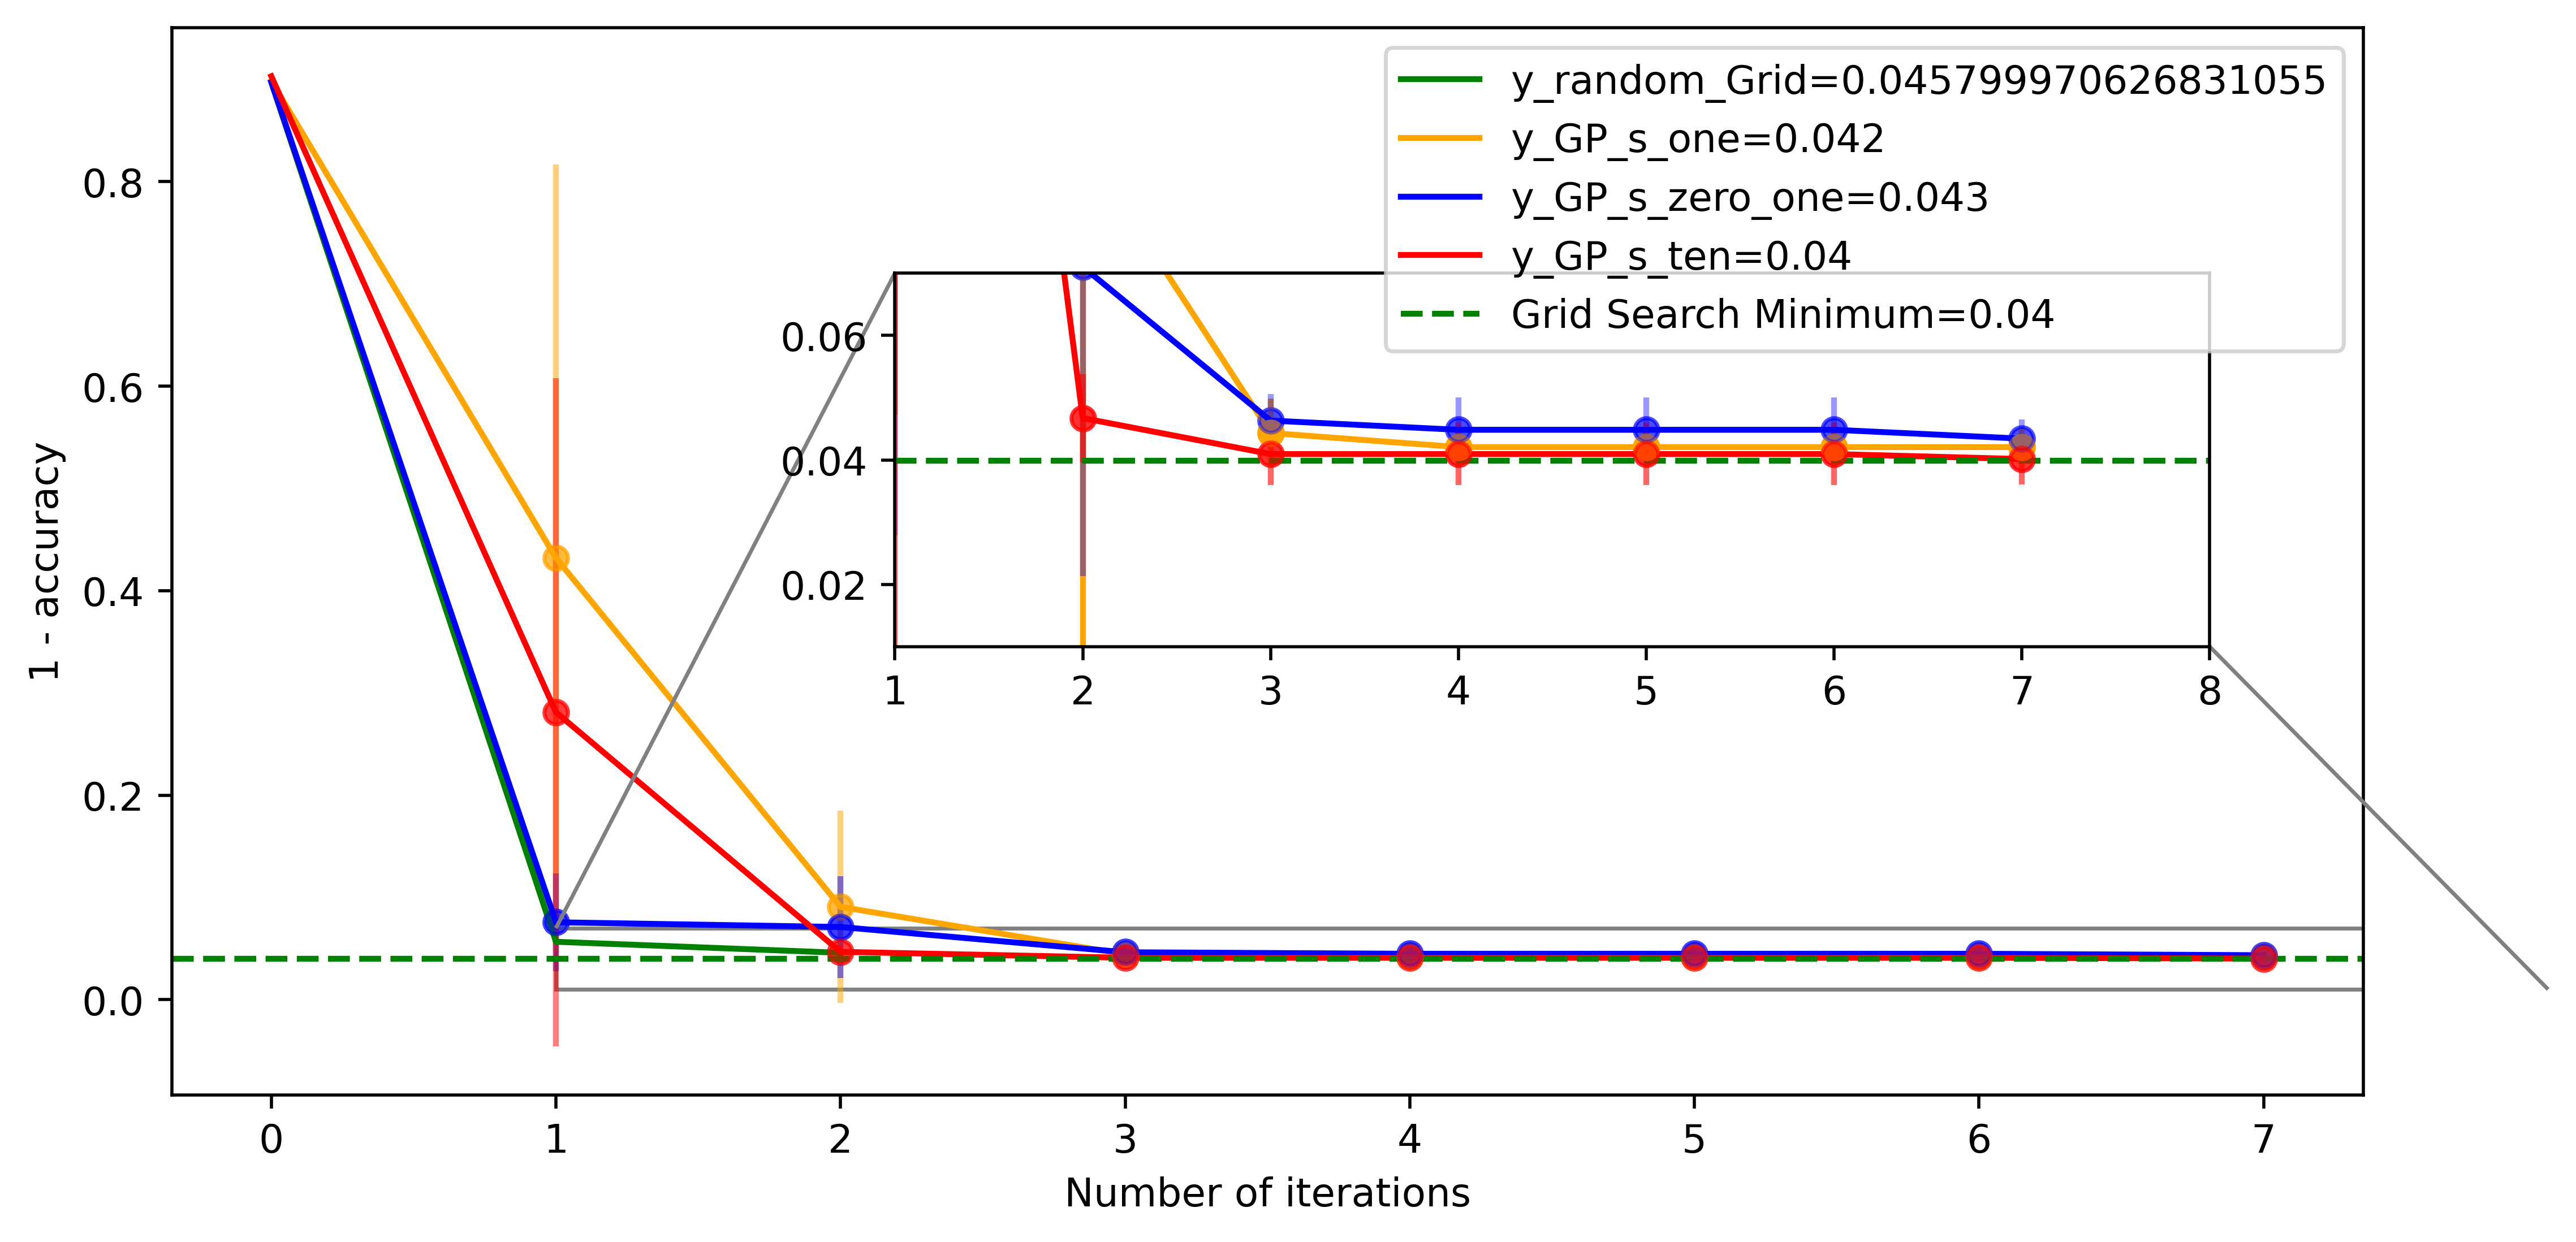

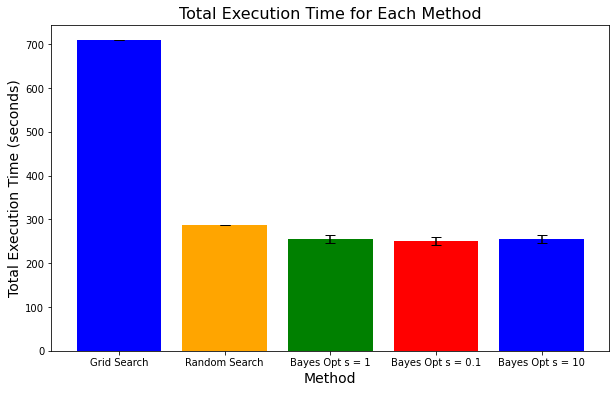

In [55]:
# Call the function
plot_results(grid_search_best_losses_cnn, grid_search_best_losses_cnn_rgs, losses_bv_s_one, losses_bv_s_zo, losses_bv_s_ten, execution_times_gs_cnn, execution_times_gs_cnn_rgs, execution_times_bo_s_one, execution_times_bo_s_zo, execution_times_bo_s_ten, s_or_t = "s")


### l hyper-hyper parameter comparison

In [59]:
# Define hyperparameter space
dropout_rate_values = [0.8, 0.6, 0.4, 0.2, 0.1]
learning_rate_values = [0.5, 0.1, 0.01, 0.001]

n_test = 5
n_sample = 6
n_wu = 2


losses_bv_l_one = np.zeros((n_test, n_sample+n_wu))
losses_bv_l_zo = np.zeros((n_test, n_sample+n_wu))
losses_bv_l_ten = np.zeros((n_test, n_sample+n_wu))

execution_times_bo_l_one = np.zeros((n_test, n_sample+n_wu))
execution_times_bo_l_zo = np.zeros((n_test, n_sample+n_wu))
execution_times_bo_l_ten = np.zeros((n_test, n_sample+n_wu))


hyperparameters = {
    "dropout_rate": dropout_rate_values,
    "learning_rate": learning_rate_values,
}

number_of_hyperparameters = len(list(hyperparameters.keys()))


# Split data into train and validation sets (MNIST)
(X_train, y_train), (X_val, y_val) = mnist.load_data()
X_train = X_train[..., np.newaxis] / 255.0
X_val = X_val[..., np.newaxis] / 255.0

In [60]:
for i in range(n_test):
    
    print("Loop:", i)
    
    l = np.ones(number_of_hyperparameters)
    s = 1

    # l = [1,1,1,1,1] s = 1
    best_hyperparams_l_one, losses_bv_l_one[i], x_sampled_l_one, losses_l_one, execution_times_bo_l_one[i] = bayes_optimization(hyperparameters, n_sample, n_wu, acq_func_EI, kernel_M52, l, s, evaluate_cnn_reduced, train_cnn_reduced, start_hyper_combination_cnn_rgs, X_train, X_val, y_train, y_val)

    l = 0.1 * np.ones(number_of_hyperparameters)

    # l = [0.1,0.1,0.1,0.1,0.1] s = 1
    best_hyperparams_l_zo, losses_bv_l_zo[i], x_sampled_l_zo, losses_l_zo, execution_times_bo_l_zo[i] = bayes_optimization(hyperparameters, n_sample, n_wu, acq_func_EI, kernel_M52, l, s, evaluate_cnn_reduced, train_cnn_reduced, start_hyper_combination_cnn_rgs, X_train, X_val, y_train, y_val)

    l = 10 * np.ones(number_of_hyperparameters)

    # l = [10,10,10,10,10] s = 1
    best_hyperparams_l_ten, losses_bv_l_ten[i], x_sampled_l_ten, losses_l_ten, execution_times_bo_l_ten[i] = bayes_optimization(hyperparameters, n_sample, n_wu, acq_func_EI, kernel_M52, l, s, evaluate_cnn_reduced, train_cnn_reduced, start_hyper_combination_cnn_rgs, X_train, X_val, y_train, y_val)


Loop: 0
Epoch 1/3
375/375 [==============================] - 12s 31ms/step - loss: 125.3500 - accuracy: 0.1018 - val_loss: 2.3288 - val_accuracy: 0.1081
Epoch 2/3
375/375 [==============================] - 12s 31ms/step - loss: 2.3240 - accuracy: 0.1021 - val_loss: 2.3137 - val_accuracy: 0.1060
Epoch 3/3
375/375 [==============================] - 11s 29ms/step - loss: 2.3313 - accuracy: 0.1012 - val_loss: 2.3271 - val_accuracy: 0.0989
Epoch 1/3
375/375 [==============================] - 12s 30ms/step - loss: 133.6456 - accuracy: 0.1025 - val_loss: 2.3457 - val_accuracy: 0.0989
Epoch 2/3
375/375 [==============================] - 11s 29ms/step - loss: 2.3279 - accuracy: 0.1018 - val_loss: 2.3224 - val_accuracy: 0.0997
Epoch 3/3
375/375 [==============================] - 11s 29ms/step - loss: 2.3326 - accuracy: 0.1025 - val_loss: 2.3253 - val_accuracy: 0.0914
Epoch 1/3
375/375 [==============================] - 12s 30ms/step - loss: 0.6772 - accuracy: 0.8881 - val_loss: 0.3667 - val_accu

375/375 [==============================] - 10s 25ms/step - loss: 0.8802 - accuracy: 0.8394 - val_loss: 0.4219 - val_accuracy: 0.9467
Epoch 2/3
375/375 [==============================] - 9s 25ms/step - loss: 0.5601 - accuracy: 0.8957 - val_loss: 0.3847 - val_accuracy: 0.9529
Epoch 3/3
375/375 [==============================] - 9s 25ms/step - loss: 0.5023 - accuracy: 0.9098 - val_loss: 0.3457 - val_accuracy: 0.9594
Epoch 1/3
375/375 [==============================] - 10s 25ms/step - loss: 1.1849 - accuracy: 0.8022 - val_loss: 0.6805 - val_accuracy: 0.9299
Epoch 2/3
375/375 [==============================] - 9s 25ms/step - loss: 0.9467 - accuracy: 0.8335 - val_loss: 0.6337 - val_accuracy: 0.9291
Epoch 3/3
375/375 [==============================] - 10s 26ms/step - loss: 0.9196 - accuracy: 0.8388 - val_loss: 0.6365 - val_accuracy: 0.9359
Epoch 1/3
375/375 [==============================] - 13s 32ms/step - loss: 126.9625 - accuracy: 0.1032 - val_loss: 2.3196 - val_accuracy: 0.0914
Epoch 2/3


375/375 [==============================] - 18s 45ms/step - loss: 0.7821 - accuracy: 0.8835 - val_loss: 0.5397 - val_accuracy: 0.9354
Epoch 2/3
375/375 [==============================] - 14s 37ms/step - loss: 0.5640 - accuracy: 0.9152 - val_loss: 0.4705 - val_accuracy: 0.9370
Epoch 3/3
375/375 [==============================] - 14s 37ms/step - loss: 0.5105 - accuracy: 0.9223 - val_loss: 0.4347 - val_accuracy: 0.9408
Epoch 1/3
375/375 [==============================] - 16s 40ms/step - loss: 120.3930 - accuracy: 0.1001 - val_loss: 2.3452 - val_accuracy: 0.0998
Epoch 2/3
375/375 [==============================] - 15s 40ms/step - loss: 2.3281 - accuracy: 0.1015 - val_loss: 2.3113 - val_accuracy: 0.1060
Epoch 3/3
375/375 [==============================] - 16s 42ms/step - loss: 2.3314 - accuracy: 0.1063 - val_loss: 2.3491 - val_accuracy: 0.0995
Epoch 1/3
375/375 [==============================] - 18s 45ms/step - loss: 1.6467 - accuracy: 0.6975 - val_loss: 0.9448 - val_accuracy: 0.9372
Epoch 2

375/375 [==============================] - 11s 27ms/step - loss: 0.6630 - accuracy: 0.8912 - val_loss: 0.3751 - val_accuracy: 0.9344
Epoch 2/3
375/375 [==============================] - 11s 29ms/step - loss: 0.3720 - accuracy: 0.9339 - val_loss: 0.2955 - val_accuracy: 0.9572
Epoch 3/3
375/375 [==============================] - 11s 30ms/step - loss: 0.3374 - accuracy: 0.9418 - val_loss: 0.2861 - val_accuracy: 0.9582
Epoch 1/3
375/375 [==============================] - 13s 32ms/step - loss: 145.0207 - accuracy: 0.1025 - val_loss: 2.3182 - val_accuracy: 0.0989
Epoch 2/3
375/375 [==============================] - 12s 33ms/step - loss: 2.3248 - accuracy: 0.1005 - val_loss: 2.3182 - val_accuracy: 0.1060
Epoch 3/3
375/375 [==============================] - 12s 33ms/step - loss: 2.3317 - accuracy: 0.1018 - val_loss: 2.3478 - val_accuracy: 0.1081
Epoch 1/3
375/375 [==============================] - 13s 32ms/step - loss: 166.1749 - accuracy: 0.1026 - val_loss: 2.3261 - val_accuracy: 0.0956
Epoch

In [61]:
import os
import pickle

file_path = "/Users/ynwa1995/Information Theory/Project/data/saved_lists_l_reduced.pkl"

# Save the lists into a file
with open(file_path, 'wb') as file:
    pickle.dump([losses_bv_s_one, losses_bv_s_zo, losses_bv_s_ten, execution_times_bo_s_one, execution_times_bo_s_zo, execution_times_bo_s_ten, grid_search_best_losses_cnn, execution_times_gs_cnn, grid_search_best_losses_cnn_rgs, execution_times_gs_cnn_rgs], file)

print("Lists saved successfully at:", file_path)


Lists saved successfully at: /Users/ynwa1995/Information Theory/Project/data/saved_lists_l_reduced.pkl


In [62]:
import os
import pickle

# Define the file path within the home directory
file_path = "/Users/ynwa1995/Information Theory/Project/data/saved_lists_l_reduced.pkl"

# Load the lists from the file
with open(file_path, 'rb') as file:
    loaded_lists = pickle.load(file)
    
# Unpack the loaded lists
(losses_bv_s_one, losses_bv_s_zo, losses_bv_s_ten, 
 execution_times_bo_s_one, execution_times_bo_s_zo, execution_times_bo_s_ten, grid_search_best_losses_cnn, execution_times_gs_cnn, grid_search_best_losses_cnn_rgs, execution_times_gs_cnn_rgs) = loaded_lists


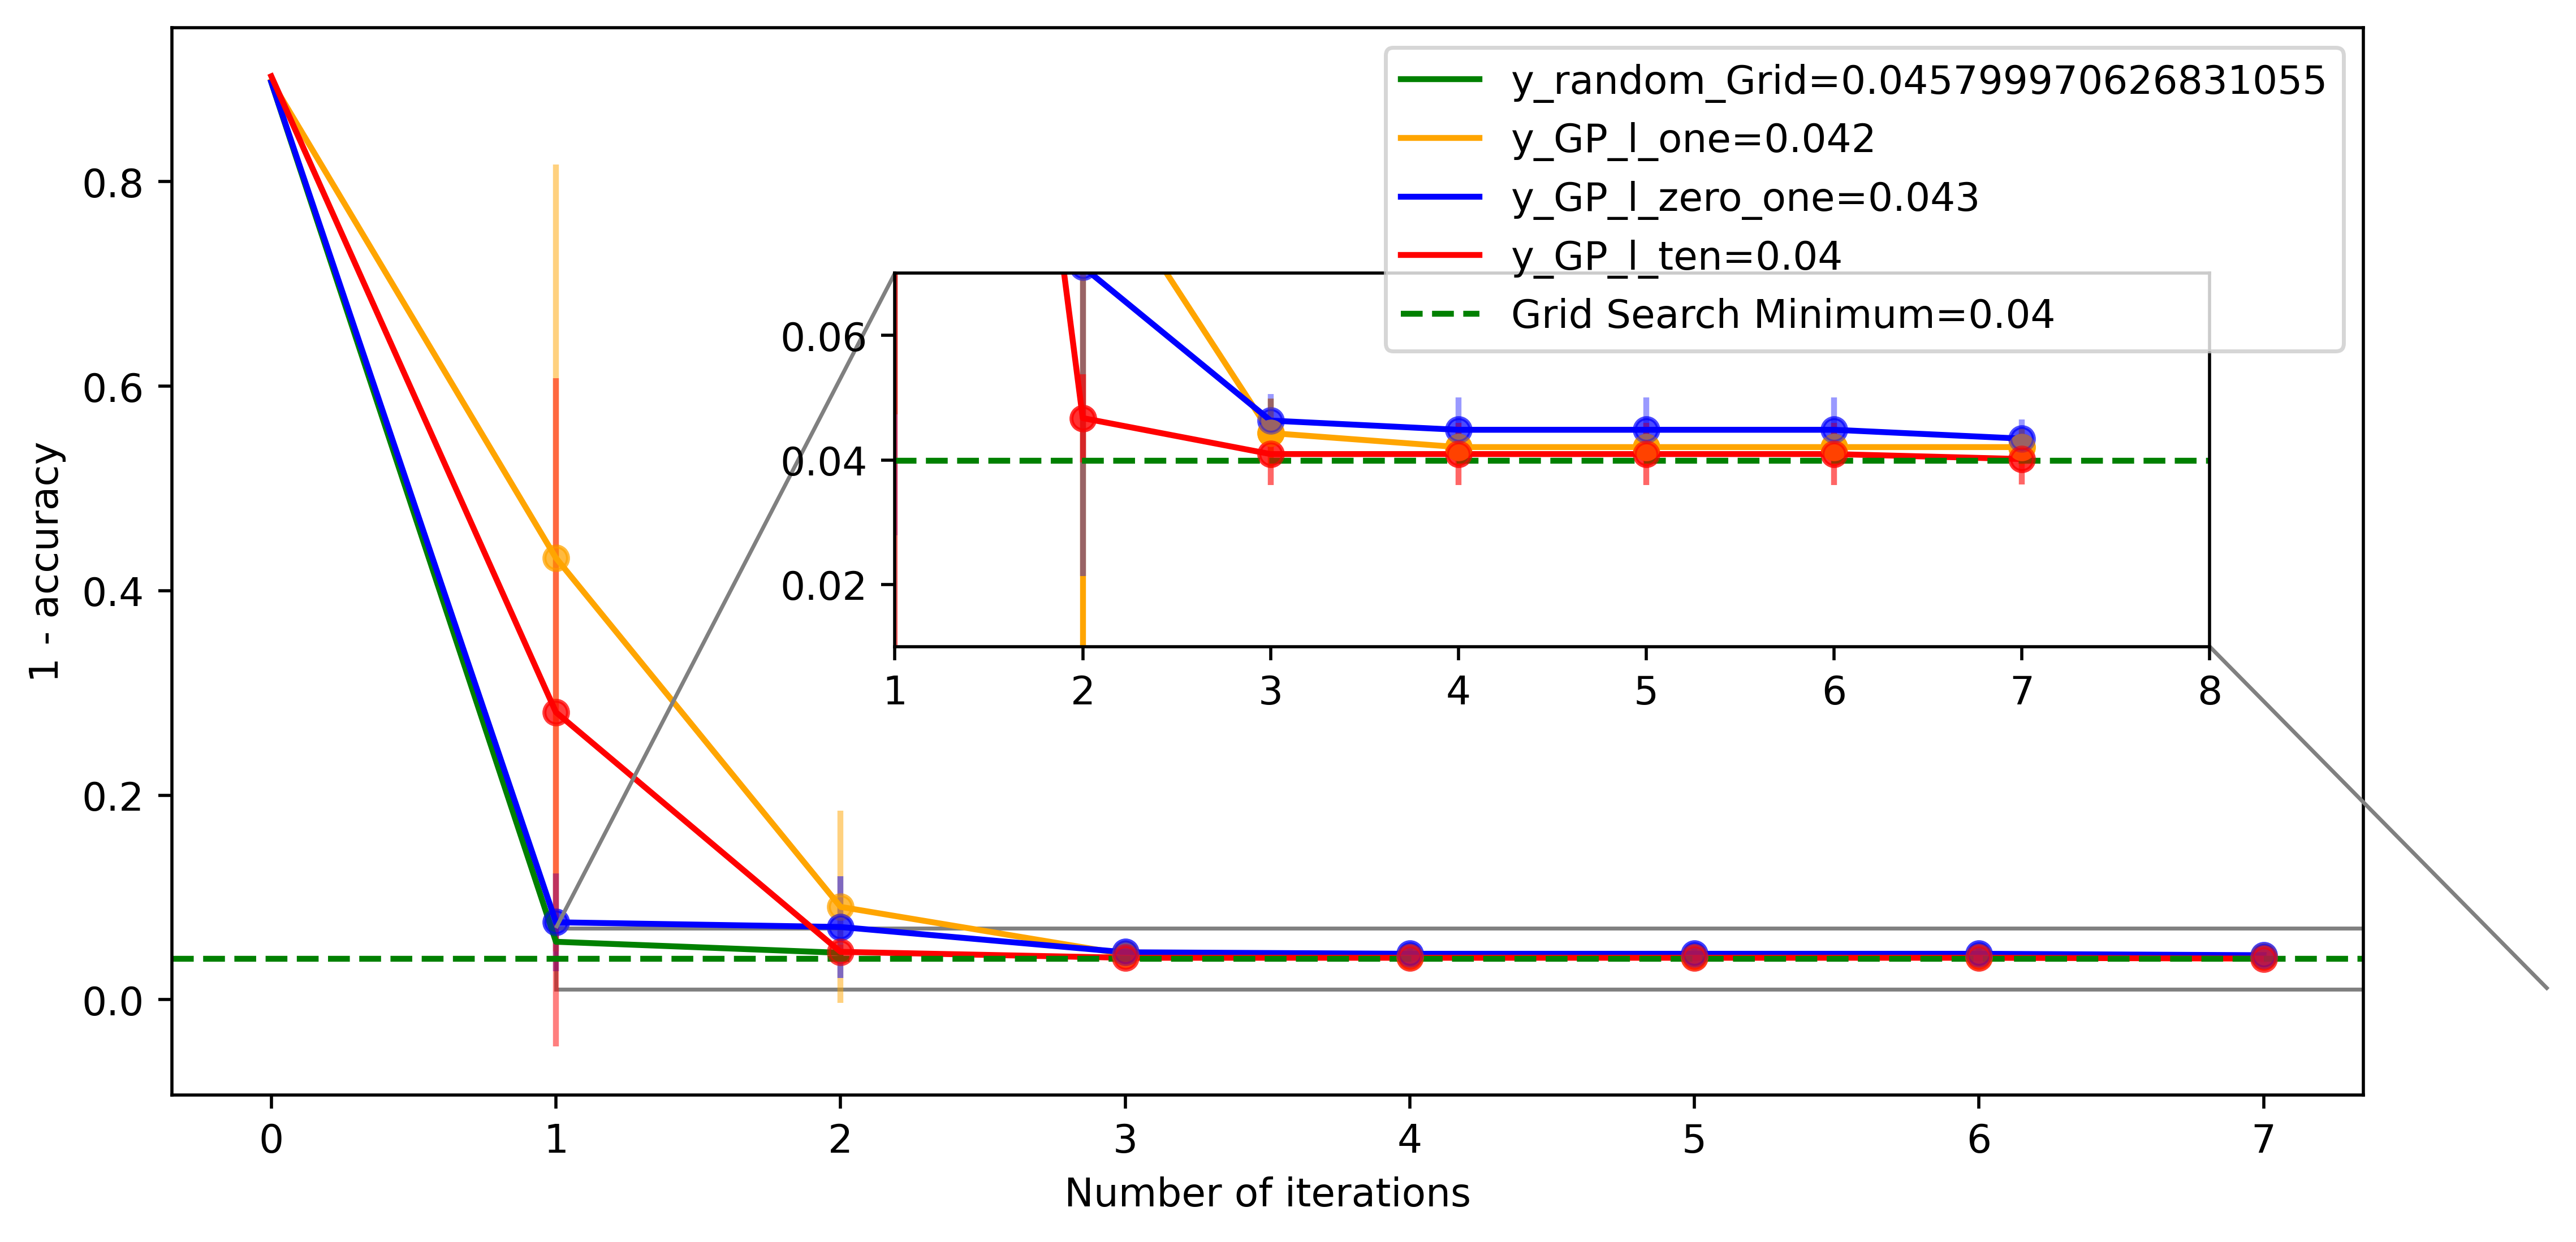

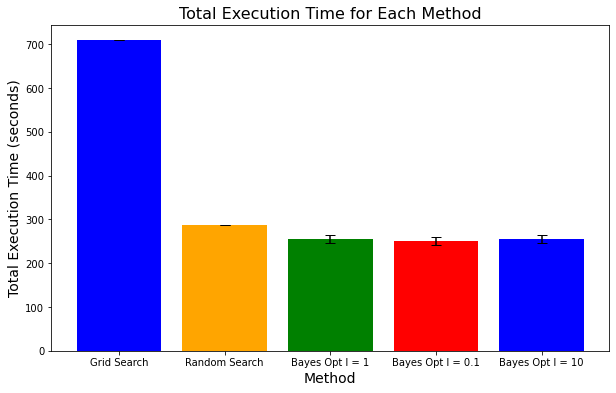

In [64]:
# Call the function
plot_results(grid_search_best_losses_cnn, grid_search_best_losses_cnn_rgs, losses_bv_s_one, losses_bv_s_zo, losses_bv_s_ten, execution_times_gs_cnn, execution_times_gs_cnn_rgs, execution_times_bo_s_one, execution_times_bo_s_zo, execution_times_bo_s_ten, s_or_t = "l")
